# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
df = pd.read_csv('data/human_body_temperature.csv')

### Is the distribution of body temperatures normal?

In [3]:
print('Mean of sample temperatures: ', np.mean(df.temperature.values))

Mean of sample temperatures:  98.24923076923075


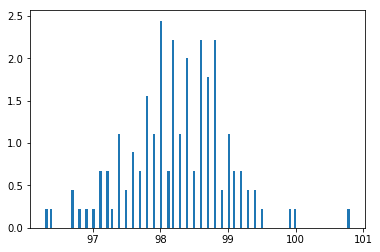

In [4]:
_=plt.hist(df.temperature.values, density=True, bins=130)
plt.show()

<div class="span5 alert alert-success">
<p> Looking at the histogram above, our data appears to be normally distributed. This allows us to proceed with our statistical methods. </p>
</div>

### Is the sample size large? Are the observations independent?

In [5]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

<div class="span5 alert alert-success">
<p> Our data contains 130 elements, which is a relatively large sample size. <br>
Our data can be considered indepent variables as long as the sample size is <=10% of the population size, which is surely the case as the entire human population is upwards of 7 billion <br>
    </p>
</div>

### Is the true population mean really 98.6 degrees F?

To approach this question, we will employ two types of statistical testing. 

1. Bootstrap Hypothesis Test
2. Frequentist Statistical Test

### Bootstrap Hypothesis Test

To start our bootstrap hypothesis testing we first generate a bootstrap sample of our original data. This is done by pulling random elements from our data 10000 times. We then want to shift our bootstrap sample mean to that of the proposed accepted mean 98.6. Our original sample mean is 98.25- so from our shifted bootstrap sample, we will shift our boostrap sample by the appropriate amount such that its new mean is 98.6. From here, we will construct 10000 of these shifted samples and examine all of their means. The bootstrap p-value is then the *proportion* of samples whose means are in the threshold of interest

In [6]:
bs_sample= np.random.choice(df.temperature.values,size=10000)
temp_shift= bs_sample-np.mean(df.temperature.values)+98.6

In [7]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [8]:
bs_shift= draw_bs_reps(temp_shift,np.mean,10000)
p_value= np.sum(bs_shift<98.6)/len(bs_shift)
print('p value:', p_value)

p value: 0.1459


<div class="span5 alert alert-success">
<p> This is a high p value and it suggests that we cannot reject the null hypothesis which states that the human body temperature is 98.6 </p> </div>

### Frequentist Statistical Testing

We will use one-sample z and t testing in the upcoming statistical analysis. Since we only have one sample of data to work with and are comparing it to an accepted mean, this model of testing is appropriate.

**Null hypothesis:** Human body temperature = 98.6 degrees Fahrenheit <br>
**Alternative hypothesis:** Human body temperature <> 98.6 degrees Fahrenheit

In [9]:
data= df.temperature.values
accepted_value= 98.6

When performing the z-test we must **approximate** the standard deviation of the *population* with the standard deviation of the *sample*. Since the sample is normally distributed, we can be confident in our approximation. 

In [10]:
z_value= (np.mean(data)-accepted_value)/(np.std(data)/np.sqrt(len(data)))
print("z-value: ",z_value)

z-value:  -5.4759252020785585


In [11]:
p_value_z= scipy.stats.norm.sf(abs(z_value))*2
print("p-value from z statistic: ", p_value_z)

p-value from z statistic:  4.3523151658713056e-08


Now to perform a t-test we will pull samples of size n=30 and n=60 from our original sample data and compute our t-values based on the corresponding standard deviations and sample sizes n

In [12]:
t_sample30= np.random.choice(data,30)
t_value30= (np.mean(t_sample30)-accepted_value)/(np.std(t_sample30)/np.sqrt(len(t_sample30)))
t_sample60= np.random.choice(data,60)
t_value60= (np.mean(t_sample60)-accepted_value)/(np.std(t_sample60)/np.sqrt(len(t_sample60)))
print("t-value (n=30): ", t_value30)
print("t-value (n=60): ", t_value60)

# to compute p-values from our t statistics, we will use the scipy library
p_value_t30= scipy.stats.t.sf(abs(t_value30),len(t_sample30)-1)*2
p_value_t60= scipy.stats.t.sf(abs(t_value60),len(t_sample60)-1)*2
print("p-value from t (n=30) statistic: ", p_value_t30)
print("p-value from t (n=60) statistic: ", p_value_t60)

t-value (n=30):  -2.540508466219164
t-value (n=60):  -3.3998424947103127
p-value from t (n=30) statistic:  0.016682179245085086
p-value from t (n=60) statistic:  0.0012146038354369905


<div class="span5 alert alert-success">
<p> The results from the seperate t and z-test yeild different p-values. The biggest contributing factor to these different p-values was the sample size that we used. In the z-test we used all of the data from the original dataset n=130. However, in the two t-tests we used samples of the original data of size n=30 and n=60 </p> </div>

<div class="span5 alert alert-success">
<p> In Summation: <br> <br>


The results of the bootstrap test were inconclusive to the point where we could not reject the null hypothesis.However, the p-values computed from the z-test and the two t-tests are independently significant (< $\alpha$) and both support the claim to reject the null hypothesis. Therefore, we reject the null hypothesis that the human body temperature is 98.5 degrees F </p> </div>

### Draw a small sample of size 10 from the data and repeat both frequentist tests

For testing a sample of size n=10 with an unknown population standard deviation, we expect the most appropriate test to be a t-test. However, we will perform a z-test using an estimated population standard deviation derived from our sample standard deviation.

In [13]:
sample10= np.random.choice(data, 10)
t_value10= (np.mean(sample10)-accepted_value)/(np.std(sample10)/np.sqrt(len(sample10)))
z_value10= (np.mean(sample10)-accepted_value)/(np.std(sample10)/np.sqrt(len(sample10)))
p_value_t10= scipy.stats.t.sf(abs(t_value10),len(sample10)-1)
p_value_z10= scipy.stats.norm.sf(abs(z_value10))
print("z-value: ", z_value10)
print("t-value: ", t_value10)
print("p-value from z statistic: ", p_value_z10)
print("p-value from t statistic: ", p_value_t10)

z-value:  -1.1626725970245169
t-value:  -1.1626725970245169
p-value from z statistic:  0.12248118189751428
p-value from t statistic:  0.13743170319448303


<div class="span5 alert alert-success">
<p> The performance of both the z-test and the t-test shows the relationship between the z and the t statistics. The computed z and t values are equivalent due to the initial conditions and assumptions we had to make from our data. Therefore the corresponding p-values are very similar. </p> </div>

### At what temperature should we consider someone's temperature to be "abnormal"?

We will reach our conclusion of "abnormal" temperature by the following: 

Compute 95% confidence interval to discover where "true" body temperature of population lies with 95%

This will give an interval of our normally distributed data. Any temperature that lies well outside this interval should be considered abnormal.

### Frequentist Approach

In [14]:
# standard error function
def ci_95(data):
    stderr= np.std(data)/np.sqrt(len(data))
    z_95= 1.960
    MoE= z_95*stderr
    print("Margin of Error (at 95% confidence): ", MoE)
    print("95% Confidence Interval: ", np.array([np.mean(data)-MoE, np.mean(data)+MoE]))

In [15]:
ci_95(data)

Margin of Error (at 95% confidence):  0.12555096480257902
95% Confidence Interval:  [98.1236798  98.37478173]


### Bootstrapping Approach

Confidence intervals are based on the **percentiles** of the **sampling distribution** of the **statistic of interest**. Therefore, we employ boostrapping to sample thousands of means (as we did before) and take the 95th percentile of these means. This will give us our 95% confidence interval

https://stats.stackexchange.com/questions/220242/relationship-between-percentile-and-confidence-interval-on-a-mean

In [23]:
bs= np.random.choice(data,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_ci_95= np.percentile(bs_means,[2.5,97.5])
print("95% confidence interval: ", bs_ci_95 )

95% confidence interval:  [98.2323   98.260681]


<div class="span5 alert alert-success">
<p> The results of the frequentist and bootstrap approaches give 2 temperature intervals <br> <br>

Frequentist: 98.12 - 98.37 <br>
Bootstrap: 98.24 - 98.26 <br>
<br>
We will observe the interval of the frequentist test, as it allows for more range of temperatures. An abnormal temperature can then be defined as any temperature that exists *well* outside of this interval. It is important to note that we have a sample of only 130 so our intervals directly reflect a relatively small sample of the entire human population. Therefore we err on the side of caution when claiming a temperature as abnormal. </p> </div>

### Is there a significant difference between males and females in normal temperature?

In [17]:
female_temp= df[df.gender=='F'].temperature.values
male_temp=df[df.gender=='M'].temperature.values

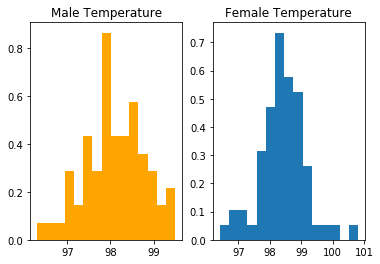

female mean temperature:  98.39384615384614
male mean temperature:  98.10461538461537


In [18]:
fig, ax= plt.subplots(1,2)
ax[0].hist(male_temp, bins=15, density=True, color='orange')
ax[0].set_title('Male Temperature')
ax[1].hist(female_temp, bins=15, density=True)
ax[1].set_title('Female Temperature')
plt.show()
print('female mean temperature: ', np.mean(female_temp))
print('male mean temperature: ', np.mean(male_temp))

Perform a **two-sample t test** to analyze significance of difference between the two mean body temperatures of male and female. This test is used to examine the difference between two means. After filtering the data into male and female datasets, we look at the respective normal body temperatures- or means of the temperatures. We then use this test to analyze the significance in the **difference** of those means by extracting a p-value. We will compare this p-value to a significance level of $\alpha$ =.05 

The method for doing so is outlined at this link https://stattrek.com/hypothesis-test/difference-in-means.aspx?Tutorial=AP

**Null hypothesis: np.mean(male_temp) - np.mean(female_temp) = 0**  <br>
The normal body temperatures of male and females are equal

**Alternative hypothesis: np.mean(male_temp) - np.mean(female_temp) != 0** <br> 
The normal body tempertatures of male and females are not equal


In [19]:
def diff_of_means(x,y,tail=1,u=0):
    n1, n2= (len(x),len(y))
    std1, std2= (np.std(x), np.std(y))
    mean1, mean2= (np.mean(x), np.mean(y))
    n=n2
    if n1<n2:
        n=n1
    SE= np.sqrt((std1**2/n1)+std2**2/n2)
    t_means= ((mean1-mean2)-u)/SE
    p_value_means= scipy.stats.t.sf(abs(t_means),n-1)
    return p_value_means*tail

In [20]:
p_value_diff_of_means= diff_of_means(male_temp, female_temp,2)
print("P value for difference of means between male and female normal body temp: ", p_value_diff_of_means)

P value for difference of means between male and female normal body temp:  0.024526425958303896


<div class="span5 alert alert-success">
<p>The results of our two-sample frequentist t test found a p-value of .025, which is less than our significance level of .05. Based upon this test, we reject our null hypothesis which asserted that normal female and male body temperatures are the same. This fact supports our previous finding that both male and female normal body temperatures are not in fact 98.6 degrees fahrenheit. The conclusion of this analysis finds that not only is the human body temperature not 98.6 degrees fahrenheit, but also male and female body temperatures are not equivalent. </p> </div>